# Recording all the actors and actresses that have worked on a Joss Whedon project

## First, I get a list of all the projects on which Joss Whedon is listed a producer.

### The list is a list of tuples containing the title and year of the project. These are used when searching the IMDB database files to find actors and actresses that have been in these titles.

In [1]:
titles = [('"Agents of S.H.I.E.L.D."', 2013), 
         ('In Your Eyes', 2014),
         ('Much Ado About Nothing', 2012),
         ('The Cabin in the Woods', 2012),
         ('"Dollhouse"', 2009),
         ('"Dr. Horrible\'s Sing-Along Blog"', 2008),
         ('"Angel"', 1999),
         ('"Firefly"', 2002),
         ('"Buffy the Vampire Slayer"', 1997)]

### This function searches through the actors.list or actresses.list text file obtained from IMDB for each title in the given list. It returns a dictionary where each key is an actor's name and the entry is a list of titles from the list that the actor appeared in. (One error: It will record an empty string actor for each film.)

In [2]:
import re
import linecache

def actors_in_projects(titles, actors_list):

    actors = {}
    for title in titles:
        file = open(actors_list, "r")
        for index, line in enumerate(file):
            if re.search(title[0], line) and re.search('(' + str(title[1]) + ')', line):
                split_line, current_index = line.split(), index
                if split_line.index(title[0].split()[0]) != 0:
                    actor = line.split('\t')[0]
                    if actor in actors:
                        actors[actor].append(title[0])
                    else:
                        actors[actor] = [title[0]]

                else:
                    name_found = False
                    while not name_found:
                        current_index -= 1
                        new_line = linecache.getline(actors_list, current_index)
                        if new_line[0] != '\t':
                            actor = new_line.split('\t')[0]
                            if actor in actors:
                                if title[0] not in actors[actor]:
                                    actors[actor].append(title[0])
                            else:
                                actors[actor] = [title[0]]
                            name_found = True
                            
    return actors

### Gets the actors and actresses in Whedon projects, and combines them into 1 dictionary.

In [3]:
actors = actors_in_projects(titles, "actors.list")
actresses = actors_in_projects(titles, "actresses.list")

In [4]:
combined = actresses.copy()
combined.update(actors)

### To plot a Venn diagram of how the projects overlap, we'll use R. To move the data to R, we'll make a csv with a row for each actor, and a column for each project. If an actor appeared in a particular project, we'll record a 1 in that position, otherwise a 0. 

In [5]:
import pandas as pd

title_list = [title[0] for title in titles]

combined_ints = {}
for person in combined:
    mini_list = [0 for i in range(len(title_list))]
    for title in combined[person]:
        mini_list[title_list.index(title)] = 1
    combined_ints[person] = mini_list
    
df = pd.DataFrame.from_dict(combined_ints, orient='index')
df.columns = title_list
df.to_csv('Whedon.csv')

### Read in the file and get a list of actors for each project. The venn() command can only create diagrams up to 5 combinations, so we'll divide the Whedon-verse into films and television shows, though there are actors that appear in both.

In [ ]:
library(gplots)

whedon = read.csv('Whedon.csv')
SHIELD = whedon["X"][whedon[2] == 1]
Eyes = whedon["X"][whedon[3] == 1]
Ado = whedon["X"][whedon[4] == 1]
Cabin = whedon["X"][whedon[5] == 1]
Dollhouse = whedon["X"][whedon[6] == 1]
Blog = whedon["X"][whedon[7] == 1]
Angel = whedon["X"][whedon[8] == 1]
Firefly = whedon["X"][whedon[9] == 1]
Buffy = whedon["X"][whedon[10] == 1]

tv_list = list(Buffy, Angel, Firefly, Dollhouse, SHIELD)
names(tv_list) = c("Buffy", "Angel","Firefly", "Dollhouse", "SHIELD")
venn(tv_list)

movies_list = list(Blog, Cabin, Ado, Eyes)
names(movies_list) = c("Dr. Horrible's", "Cabin", "Much Ado", "Eyes")
venn(movies_list)

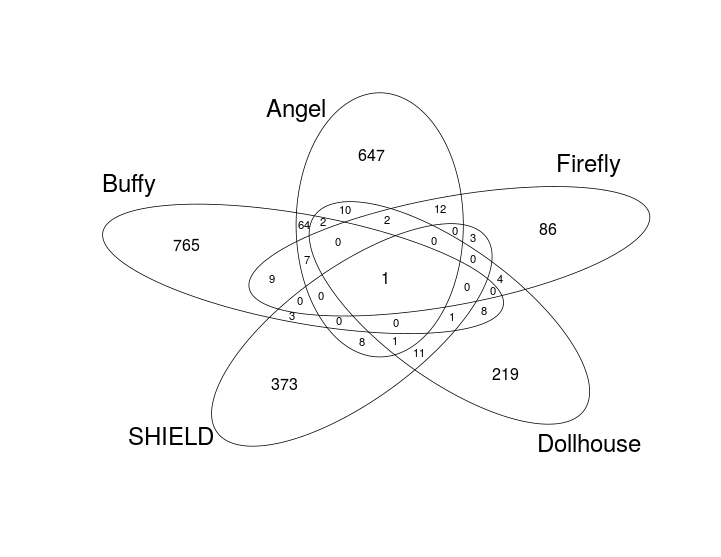

In [6]:
from IPython.display import Image
Image(filename='TV.png') 

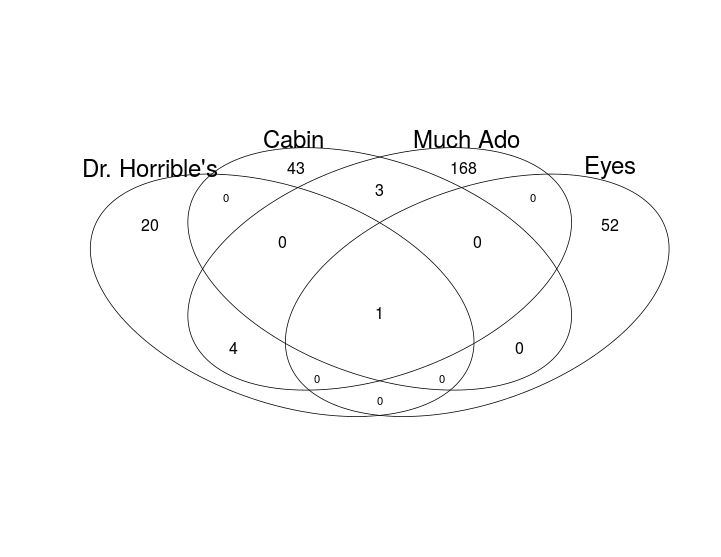

In [7]:
Image(filename='Film.png') 

### If we want to see the most popular actors, we'll get a list of the number of projects each actor appeared in,  sort by highest number, and graph as a bar chart.

In [8]:
name_list = [person for person in combined]
num_list = [len(combined[person]) for person in combined]

sorted_indices = [i[0] for i in sorted(enumerate(num_list), key=lambda x:x[1])]

label_list = [name_list[i] for i in sorted_indices[-6:-1]]
plot_list = [num_list[i] for i in sorted_indices[-6:-1]]

In [9]:
import matplotlib

font = {'family' : 'monospace',
        'weight' : 'light',
        'size'   : 20}

matplotlib.rc('font', **font)
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['savefig.dpi'] = 300
%reload_ext autoreload

google = ["#176ced", "#d9432f", "#ffb700", "#009a57", "#777777"]

/usr/local/lib/python2.7/dist-packages/matplotlib-1.5.dev1-py2.7-linux-x86_64.egg/matplotlib/axes/_axes.py:490: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


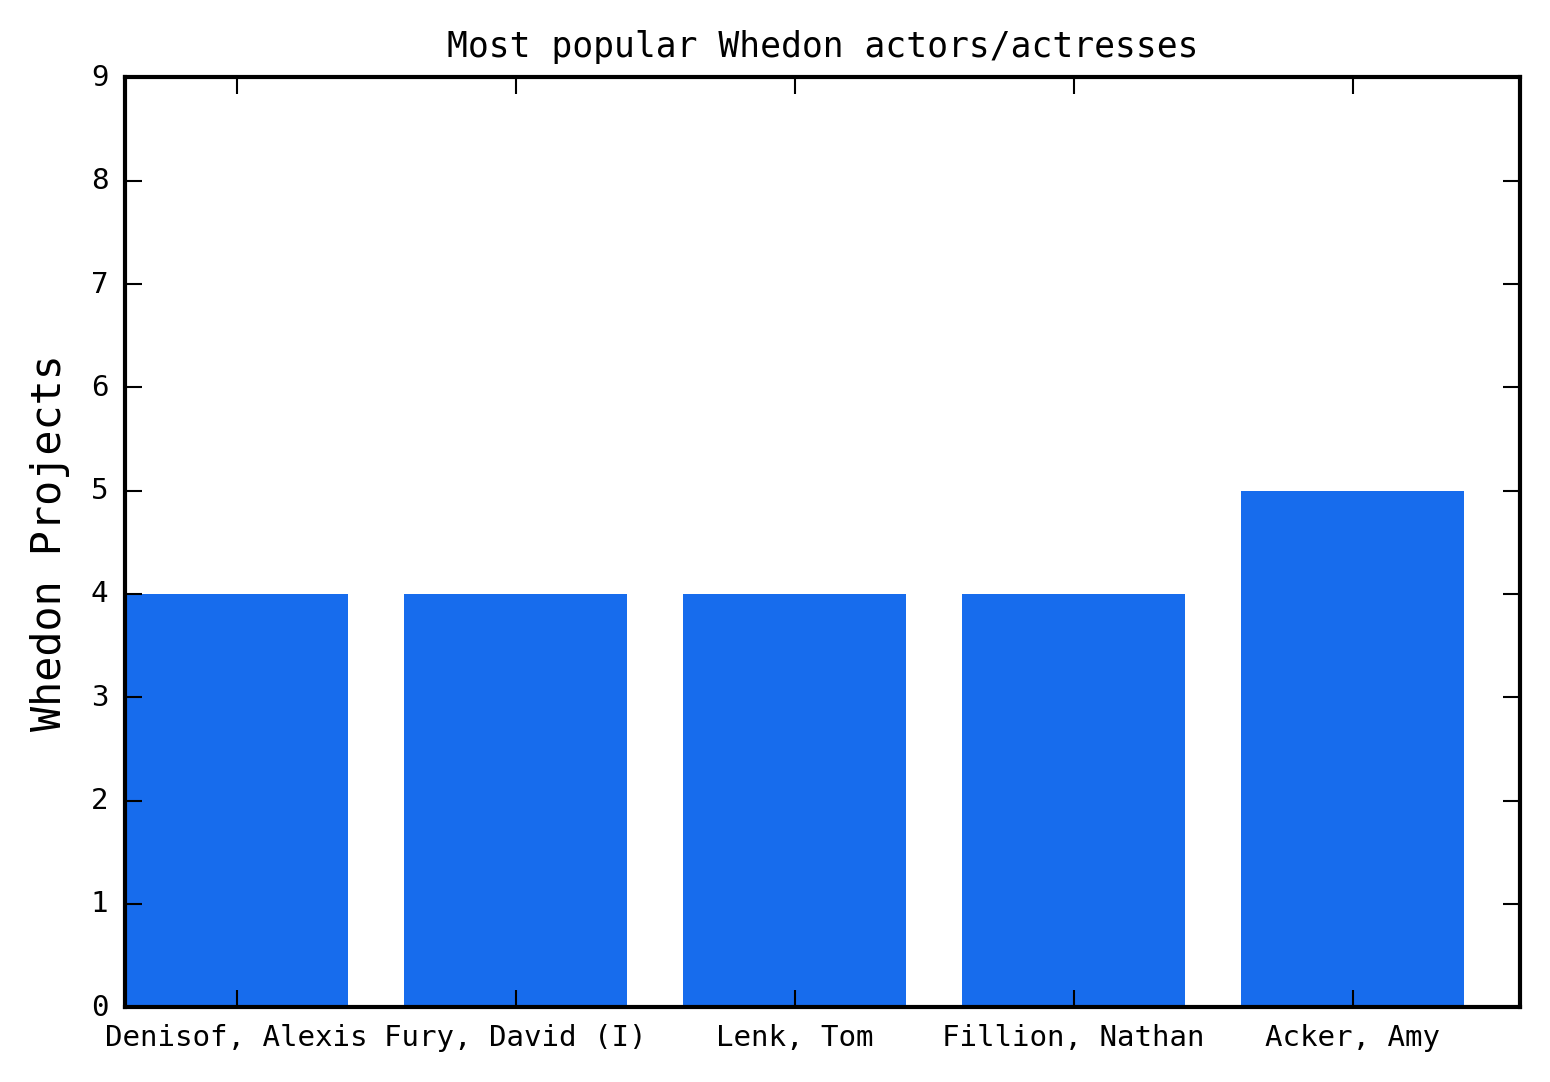

In [10]:
plt.bar([i for i in range(len(plot_list))], plot_list, width = 0.8,
    edgecolor = "none", color = google[0],)

plt.xticks([i + 0.4 for i in range(len(plot_list))], label_list)

plt.legend(fontsize = "x-small", loc = 1)
plt.ylabel("Whedon Projects")
plt.ylim(0, 9)
plt.tick_params(labelsize = 7)
plt.title("Most popular Whedon actors/actresses", fontsize = "small")
plt.show()